<a href="https://colab.research.google.com/github/Jushef/Proyectos-ML-DL/blob/main/Aprendizaje%20Supervisado/Classification/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud Detection**
El objetivo de este Proyecto es utilizar varios modelos basados en la clasificación para detectar si una transacción es un pago normal o un fraude.

##**Content**

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)    
    * [4.2.Feature Selection](#3.2) 
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Evaluate Models](#4.2) 
* [6. Model Tuning](#5)
    * [5.1. Model Tuning-Right Evaluation Metric](#5.1)
    * [5.2. Model Tuning-Balancing the sample](#5.2) 


<a id='0'></a>
# 1. Problem Definition

En el marco de clasificación definido para este estudio de caso, la variable de respuesta toma un valor de 1 en caso de que la transacción dada sea un fraude y 0 en caso contrario.

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeas. Este conjunto de datos presenta las transacciones ocurridas en dos días, donde tenemos 492 fraudes de 284.807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172% de todas las transacciones. La característica "Clase" es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario. Las características son el resultado de la transformación PCA y no son intuitivas en cuanto a sus nombres.

Los datos pueden descargarse de: https://www.kaggle.com/mlg-ulb/creditcardfraud


<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Libraries for Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

# Libraries for Saving the Model
from pickle import dump
from pickle import load

<a id='1.2'></a>
## 2.2. Loading the Data

In [ ]:
dataset = pd.read_csv('/content/sample_data/creditcard.csv')

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [ ]:
# shape
dataset.shape

(284807, 31)

In [ ]:
# consultar los datos
pd.set_option('display.width', 100)
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# describe data
pd.set_option('precision', 3)
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,2.848e+05,284807.000,284807.000
mean,94813.860,3.920e-15,5.688e-16,-8.769e-15,2.782e-15,-1.553e-15,2.011e-15,-1.694e-15,-1.927e-16,-3.137e-15,1.769e-15,9.170e-16,-1.811e-15,1.693e-15,1.479e-15,3.482e-15,1.392e-15,-7.528e-16,4.329e-16,9.050e-16,5.086e-16,1.537e-16,7.960e-16,5.368e-16,4.458e-15,1.453e-15,1.699e-15,-3.660e-16,-1.206e-16,88.350,0.002
std,47488.146,1.959e+00,1.651e+00,1.516e+00,1.416e+00,1.380e+00,1.332e+00,1.237e+00,1.194e+00,1.099e+00,1.089e+00,1.021e+00,9.992e-01,9.953e-01,9.586e-01,9.153e-01,8.763e-01,8.493e-01,8.382e-01,8.140e-01,7.709e-01,7.345e-01,7.257e-01,6.245e-01,6.056e-01,5.213e-01,4.822e-01,4.036e-01,3.301e-01,250.120,0.042
min,0.000,-5.641e+01,-7.272e+01,-4.833e+01,-5.683e+00,-1.137e+02,-2.616e+01,-4.356e+01,-7.322e+01,-1.343e+01,-2.459e+01,-4.797e+00,-1.868e+01,-5.792e+00,-1.921e+01,-4.499e+00,-1.413e+01,-2.516e+01,-9.499e+00,-7.214e+00,-5.450e+01,-3.483e+01,-1.093e+01,-4.481e+01,-2.837e+00,-1.030e+01,-2.605e+00,-2.257e+01,-1.543e+01,0.000,0.000
25%,54201.500,-9.204e-01,-5.985e-01,-8.904e-01,-8.486e-01,-6.916e-01,-7.683e-01,-5.541e-01,-2.086e-01,-6.431e-01,-5.354e-01,-7.625e-01,-4.056e-01,-6.485e-01,-4.256e-01,-5.829e-01,-4.680e-01,-4.837e-01,-4.988e-01,-4.563e-01,-2.117e-01,-2.284e-01,-5.424e-01,-1.618e-01,-3.546e-01,-3.171e-01,-3.270e-01,-7.084e-02,-5.296e-02,5.600,0.000
50%,84692.000,1.811e-02,6.549e-02,1.798e-01,-1.985e-02,-5.434e-02,-2.742e-01,4.010e-02,2.236e-02,-5.143e-02,-9.292e-02,-3.276e-02,1.400e-01,-1.357e-02,5.060e-02,4.807e-02,6.641e-02,-6.568e-02,-3.636e-03,3.735e-03,-6.248e-02,-2.945e-02,6.782e-03,-1.119e-02,4.098e-02,1.659e-02,-5.214e-02,1.342e-03,1.124e-02,22.000,0.000
75%,139320.500,1.316e+00,8.037e-01,1.027e+00,7.433e-01,6.119e-01,3.986e-01,5.704e-01,3.273e-01,5.971e-01,4.539e-01,7.396e-01,6.182e-01,6.625e-01,4.931e-01,6.488e-01,5.233e-01,3.997e-01,5.008e-01,4.589e-01,1.330e-01,1.864e-01,5.286e-01,1.476e-01,4.395e-01,3.507e-01,2.410e-01,9.105e-02,7.828e-02,77.165,0.000
max,172792.000,2.455e+00,2.206e+01,9.383e+00,1.688e+01,3.480e+01,7.330e+01,1.206e+02,2.001e+01,1.559e+01,2.375e+01,1.202e+01,7.848e+00,7.127e+00,1.053e+01,8.878e+00,1.732e+01,9.254e+00,5.041e+00,5.592e+00,3.942e+01,2.720e+01,1.050e+01,2.253e+01,4.585e+00,7.520e+00,3.517e+00,3.161e+01,3.385e+01,25691.160,1.000


* Comprobemos el número de casos de fraude frente al de no fraude en el conjunto de datos.

In [ ]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(dataset.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


* El conjunto de datos está desequilibrado, ya que la mayoría de las transacciones no son fraudulentas.

<a id='2.2'></a>
## 3.2. Data Visualization

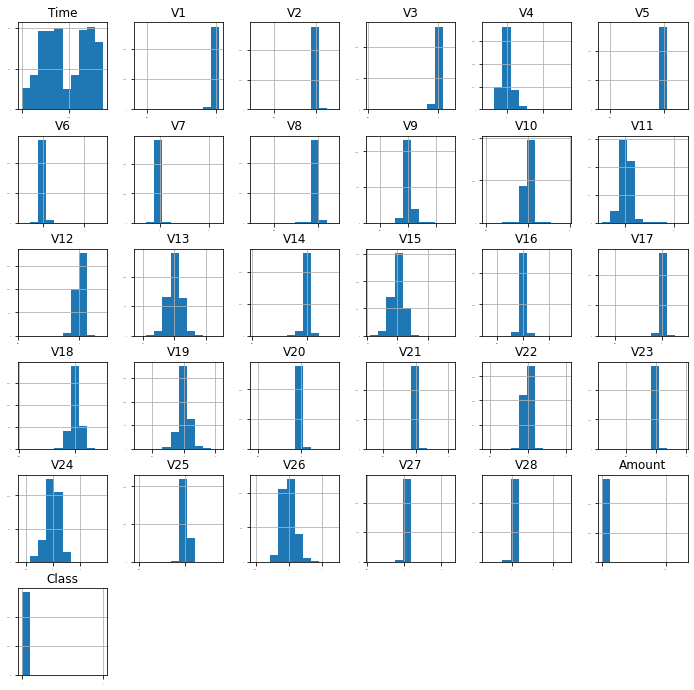

In [ ]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

* La distribución de la mayoría de las variables está muy sesgada. Sin embargo, dado que no se conocen los nombres de las variables, no se puede intuir mucho del gráfico.

<a id='3'></a>
## 4. Data Preparation

In [ ]:
# Comprobación de cualquier valor nulo y eliminación de los valores nulos''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


* No hay nulos en los datos, y los datos ya están en formato flotante, por lo que no es necesario limpiar o categorizar los datos.

<a id='3.2'></a>
## 4.2. Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest( k=10)
bestfeatures

Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concatenar dos marcos de datos para una mejor visualización 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs      Score
17   V17  33979.169
14   V14  28695.548
12   V12  20749.822
10   V10  14057.980
16   V16  11443.349
3     V3  11014.508
7     V7  10349.605
11   V11   6999.355
4     V4   5163.832
18   V18   3584.381


* Aunque algunas de las características son relevantes, no se da una preferencia significativa a la selección de características.

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split and Evaluation Metrics

In [ ]:
# dividir el conjunto de datos de validación para el final
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']

validation_size = 0.2
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

<a id='4.2'></a>
## 5.2. Checking Models and Algorithms

In [ ]:
# opciones de prueba para la clasificación
num_folds = 10
seed = 7

In [ ]:
# comprobar al azar algunos algoritmos básicos de clasificación
# Dado que los datos son enormes, se comentan algunos de los algoritmos de clasificación más lentos
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# #Neural Network
# models.append(('NN', MLPClassifier()))
# # #Ensable Models 
# # Boosting methods
# models.append(('AB', AdaBoostClassifier()))
# models.append(('GBM', GradientBoostingClassifier()))
# # Bagging methods
# models.append(('RF', RandomForestClassifier()))
# models.append(('ET', ExtraTreesClassifier()))

In [ ]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998960 (0.000140)
LDA: 0.999350 (0.000149)
KNN: 0.998332 (0.000310)
CART: 0.999170 (0.000191)


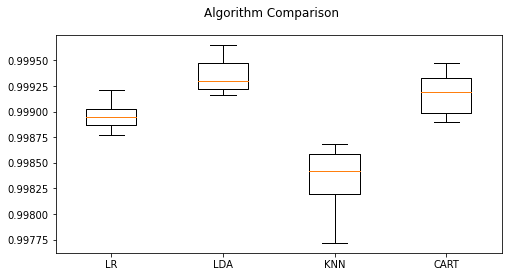

In [ ]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
plt.show()

* La precisión es muy alta, dado que la precisión se centra en el caso general de no fraude, pero vamos a comprobar lo bien que predice el caso de fraude. Eligiendo uno de los modelos CART de los resultados anteriores

In [ ]:
# prepare model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
# estimación de la precisión en el conjunto de validación
# rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)

print(f'Acurracy Score: {accuracy_score(Y_validation, predictions)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(Y_validation, predictions)}')
print('\n')
print(f"Classification Report: \n{classification_report(Y_validation, predictions)}")

Acurracy Score: 0.9991046662687406


Confusion Matrix: 
[[56833    29]
 [   22    78]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.73      0.78      0.75       100

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



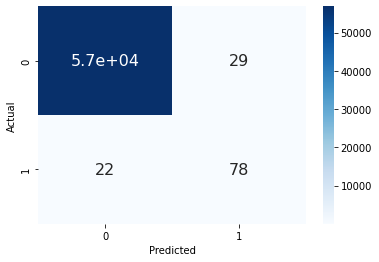

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

* Aunque los resultados son buenos, todavía 22 de cada 100 fraudes no son detectados. Por lo tanto, deberíamos centrarnos en el recuerdo, que es una métrica que minimiza los falsos negativos.

<a id='5'></a>
## 6. Model Tuning

<a id='5.1'></a>
## 6.1. Model Tuning by choosing correct evaluation metric
Se selecciona la métrica de evaluación recall, que es una métrica que minimiza los falsos negativos.

In [ ]:
scoring = 'recall'

In [ ]:
# comprobar al azar algunos algoritmos básicos de clasificación
# Dado que los datos son enormes, se comentan algunos de los algoritmos de clasificación más lentos
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# #Neural Network
# models.append(('NN', MLPClassifier()))
# # #Ensable Models 
# # Boosting methods
# models.append(('AB', AdaBoostClassifier()))
# models.append(('GBM', GradientBoostingClassifier()))
# # Bagging methods
# models.append(('RF', RandomForestClassifier()))
# models.append(('ET', ExtraTreesClassifier()))

In [ ]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.673973 (0.052872)
LDA: 0.754710 (0.046704)
KNN: 0.033329 (0.028641)
CART: 0.753532 (0.050432)


* Dado que el LDA tiene el mejor recuerdo de todos los modelos, se utiliza para evaluar el conjunto de pruebas.

In [ ]:
# prepare model
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [ ]:
# estimación de la precisión en el conjunto de validación
# rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(f'Acurracy Score: {accuracy_score(Y_validation, predictions)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(Y_validation, predictions)}')
print('\n')
print(f"Classification Report: \n{classification_report(Y_validation, predictions)}")

Acurracy Score: 0.9995435553526912


Confusion Matrix: 
[[56854     8]
 [   18    82]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.91      0.82      0.86       100

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



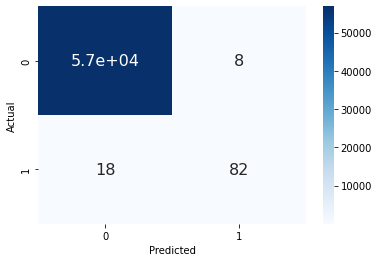

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

* LDA tiene un rendimiento mucho mejor, ya que sólo 18 de los casos de fraude no se detectan. Además, los falsos positivos también son menores. Sin embargo, todavía hay 18 casos de fraude en el conjunto de pruebas que no se detectan. Esto se tratará en la siguiente sección.

<a id='5.2'></a>
## 6.2. Model Tuning for balancing the sample by Random Under Sampling
En esta fase del proyecto implementaremos el "Random Under Sampling" que básicamente consiste en eliminar datos para tener un conjunto de datos más equilibrado y así evitar que nuestros modelos se sobreajusten.

Pasos:

Lo primero que tenemos que hacer es determinar cuán desequilibrada está nuestra clase (utilizar "value_counts()" en la columna de la clase para determinar la cantidad de cada etiqueta)
Una vez que determinemos cuántas instancias se consideran transacciones fraudulentas (Fraude = "1") , debemos llevar las transacciones no fraudulentas a la misma cantidad que las transacciones fraudulentas (asumiendo que queremos una proporción de 50/50), esto será equivalente a 492 casos de transacciones fraudulentas y 492 casos de transacciones no fraudulentas.
Después de aplicar esta técnica, tenemos una submuestra de nuestro marco de datos con una proporción de 50/50 con respecto a nuestras clases. A continuación, el siguiente paso que implementaremos será barajar los datos para ver si nuestros modelos pueden mantener una cierta precisión cada vez que ejecutemos este script.
Nota: El principal problema del "submuestreo aleatorio" es que corremos el riesgo de que nuestros modelos de clasificación no sean tan precisos como quisiéramos, ya que hay una gran pérdida de información (al extraer 492 transacciones no fraudulentas de 284.315 transacciones no fraudulentas).


In [ ]:
Y_train.head()

44828     0
221877    0
278826    0
149792    0
226041    0
Name: Class, dtype: int64

In [ ]:
Y_train.value_counts()

0    227453
1       392
Name: Class, dtype: int64

In [ ]:
df = pd.concat([X_train, Y_train], axis=1)
# cantidad de clases de fraude 392 filas.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:392]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Mezclar las filas del marco de datos
df_new = normal_distributed_df.sample(frac=1, random_state=42)

# dividir el conjunto de datos de validación para el final
Y_train_new= df_new["Class"]
X_train_new = df_new.loc[:, dataset.columns != 'Class']

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


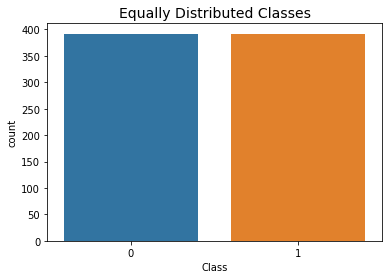

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(df_new['Class'].value_counts()/len(df_new))
sns.countplot('Class', data=df_new)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

* Ahora que tenemos nuestro marco de datos correctamente equilibrado, podemos seguir con nuestro análisis y preprocesamiento de datos. Dado que el número total de puntos de datos es de unos 900, probamos todos los modelos, incluidos los de aprendizaje profundo. Sin embargo, dado que los datos están equilibrados, la métrica utilizada aquí es la "accuracy", ya que se centra en los falsos positivos y los falsos negativos.


In [ ]:
scoring='accuracy'

In [ ]:
# comprobar los algoritmos al azar
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Neural Network
models.append(('NN', MLPClassifier()))

# #Ensable Models 

# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))

# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

In [ ]:
# Escribir el clasificador de aprendizaje profundo en caso de que el indicador de aprendizaje profundo se establezca como verdadero
# Poner el siguiente Flag a 1 si el Flag de Modelos de Aprendizaje Profundo tiene que ser habilitado

EnableDLModelsFlag = 1
if EnableDLModelsFlag == 1 :   
    # Función para crear el modelo, necesaria para KerasClassifier
    def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
        # crear un modelo
        model = Sequential()
        model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation=activation))
        model.add(Dense(32, activation=activation))
        model.add(Dense(1, activation='sigmoid'))
        # Compilar el modelo
        optimizer = SGD(lr=learn_rate, momentum=momentum)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model    
    models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.924878 (0.037261)
LDA: 0.914671 (0.034874)
KNN: 0.631272 (0.036860)
CART: 0.887845 (0.030234)
NB: 0.864898 (0.052529)
SVM: 0.548539 (0.037907)
NN: 0.577799 (0.076954)
AB: 0.924862 (0.033185)
GBM: 0.931224 (0.032111)
RF: 0.936368 (0.042364)
ET: 0.936336 (0.035367)
DNN: 0.673191 (0.138911)


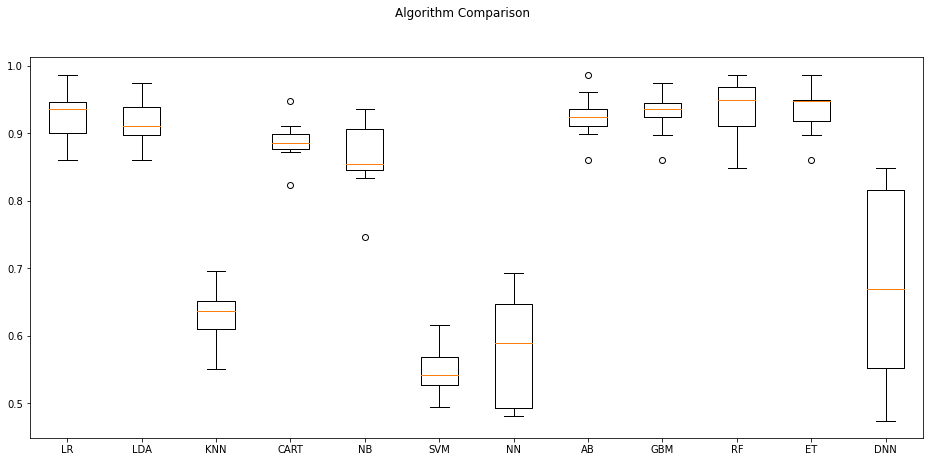

In [ ]:
# comparar algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(16,7)
plt.show()

* Dado que RF es el mejor modelo de todos los modelos, se realiza una búsqueda en la red para el modelo GBM variando el número de estimadores y la profundidad máxima.

In [ ]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (por defecto=100)
    El número de etapas de refuerzo a realizar. 
    El refuerzo de gradiente es bastante robusto al sobreajuste, por lo que un número grande suele dar lugar a un mejor rendimiento.
max_depth : entero, opcional (por defecto=3)
    profundidad máxima de los estimadores de regresión individuales. 
    La profundidad máxima limita el número de nodos del árbol. 
    Ajuste este parámetro para obtener el mejor rendimiento; el mejor valor depende de la interacción de las variables de entrada    
criterion : cadena, opcional (por defecto="gini")
    La función para medir la calidad de una división. 
    Los criterios admitidos son "gini" para la impureza de Gini y "entropía" para la ganancia de información. 
    
'''   
scaler = StandardScaler().fit(X_train_new)
rescaledX = scaler.transform(X_train_new)
n_estimators = [20,80,90,100,120]
max_depth= [5,10,15]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_new)

# Imprimir Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.937601 using {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
#12 0.932489 (0.029958) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#25 0.927410 (0.030427) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#23 0.928676 (0.032099) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 90}
#26 0.927410 (0.034893) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
#26 0.927410 (0.035361) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 120}
#16 0.932457 (0.030525) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#4 0.935054 (0.035544) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#23 0.928676 (0.038915) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 90}
#11 0.932506 (0.035842) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
#7 0.935037 (0.034225) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 120}
#18 0.931191 (0.030015) with:

In [ ]:
# preparar modelo
model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=100)
model.fit(rescaledX, Y_train_new)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [ ]:
# estimar la precisión en el conjunto de validación original
predictions = model.predict(X_validation)

print(f'Accuracy Score: {accuracy_score(Y_validation, predictions)}')
print('\n')
print(f'Confusion Matrix: \n{confusion_matrix(Y_validation, predictions)}')
print('\n')
print(f'Classification Report: \n{classification_report(Y_validation, predictions)}')

Accuracy Score: 0.02129489835328816


Confusion Matrix: 
[[ 1113 55749]
 [    0   100]]


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.02      0.04     56862
           1       0.00      1.00      0.00       100

    accuracy                           0.02     56962
   macro avg       0.50      0.51      0.02     56962
weighted avg       1.00      0.02      0.04     56962



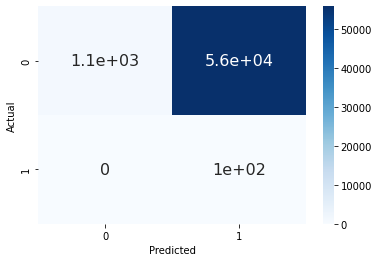

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

* Los resultados en el conjunto de pruebas son realmente buenos y el modelo funciona mucho mejor, sin que se haya detectado ningún caso de fraude.

## Conclusión:

La elección de la métrica correcta conduce a una mejora en los casos de fraude detectados correctamente. El submuestreo ha dado lugar a una mejora significativa, ya que todos los casos de fraude del conjunto de pruebas se identifican correctamente tras el submuestreo.

Sin embargo, el submuestreo tiene su contrapartida. En los datos submuestreados, nuestro modelo es incapaz de detectar correctamente un gran número de transacciones no fraudulentas y, en cambio, clasifica erróneamente esas transacciones no fraudulentas como casos de fraude:

La elección de la métrica correcta conduce a una mejora de los casos de fraude detectados correctamente. El submuestreo ha dado lugar a una mejora significativa, ya que todos los casos de fraude del conjunto de pruebas se identifican correctamente tras el submuestreo.

Sin embargo, el submuestreo tiene su contrapartida. En los datos submuestreados, nuestro modelo es incapaz de detectar correctamente un gran número de transacciones no fraudulentas y, en cambio, clasifica erróneamente esas transacciones no fraudulentas como casos de fraude.